In [109]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
from matplotlib import style
import utils as utils

In [110]:
style.use('dark_background')

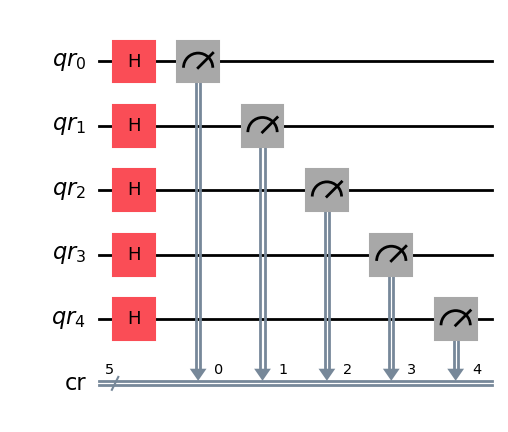

In [111]:
# Otteniamo e stampiamo il circuito quantistico per ottenere un numero base 2
n = 5
qr = QuantumRegister(n, 'qr')
cr = ClassicalRegister(n, 'cr')
random_binary_number_circuit = QuantumCircuit(qr, cr)
for index in range(0, n):
    random_binary_number_circuit.h(qr[index])
random_binary_number_circuit.measure(qr, cr)
random_binary_number_circuit.draw(output = 'mpl')

In [112]:
# Esecuzione circuito quantistico random_binary_number_circuit
backend = Aer.get_backend('statevector_simulator')
job = transpile(random_binary_number_circuit, backend=backend)
shots = 1
result = backend.run(job, shots=shots).result()
counts = result.get_counts(random_binary_number_circuit)

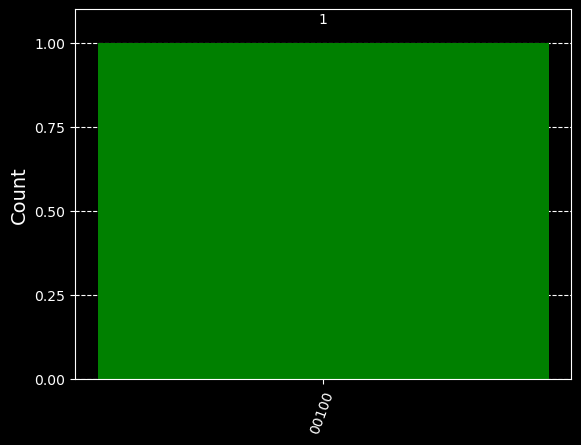

In [113]:
# Visualizzazione istogramma
plot_histogram(counts, color='green')

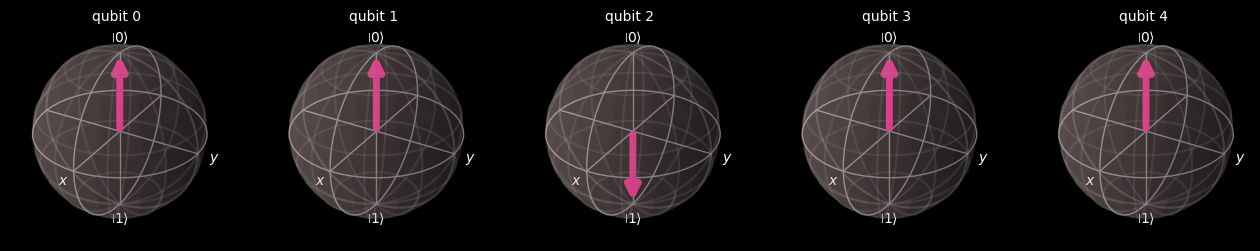

In [114]:
state = result.get_statevector()
plot_bloch_multivector(state)

In [115]:
# Stampa numero base 2 casuale ottenuto e numero base 10 casuale ottenuto
binary_number = list(counts.keys())[0]
decimal_number = utils.from_binary_to_decimal(binary_number)
print("Numero base 2 casuale: ", binary_number)
print("Numero base 10 casuale: ", decimal_number)

Numero base 2 casuale:  00100
Numero base 10 casuale:  4


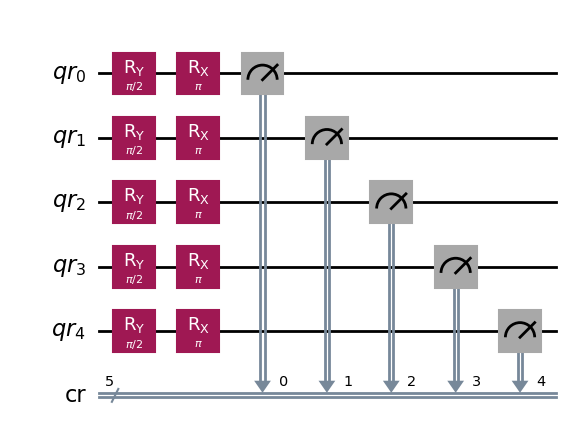

In [116]:
# original
#random_binary_number_circuit = transpile(random_binary_number_circuit, basis_gates=['u1', 'u2', 'u3', 'rz', 'sx', 'x', 'cx', 'id'], optimization_level=3)
# simple
#random_binary_number_circuit = transpile(random_binary_number_circuit, basis_gates=['cx', 'u3'], optimization_level=3)
# ibm_perth
#random_binary_number_circuit = transpile(random_binary_number_circuit, basis_gates=['cx', 'id', 'rz', 'sx', 'x'], optimization_level=3)
# ibm_sherbroke
#random_binary_number_circuit = transpile(random_binary_number_circuit, basis_gates=['ecr', 'id', 'rz', 'sx', 'x'], optimization_level=3)
# rpcx
random_binary_number_circuit = transpile(random_binary_number_circuit, basis_gates=['cx', 'rx', 'ry', 'rz', 'p'], optimization_level=3)
random_binary_number_circuit.draw(output = 'mpl')